In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [ ]:
X

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,1,0,3,0,5,0,1,5,6,7
253676,1,1,1,18,0,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,1,28,0,0,0,1,1,0,...,1,0,1,0,0,0,0,2,5,2
253678,1,0,1,23,0,0,0,0,1,1,...,1,0,3,0,0,0,1,7,5,1


In [ ]:
y

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0
...,...
253675,0
253676,1
253677,0
253678,0


In [ ]:
y.value_counts()

,count
Diabetes_binary,
0,218334
1,35346


<Axes: xlabel='BMI', ylabel='Count'>

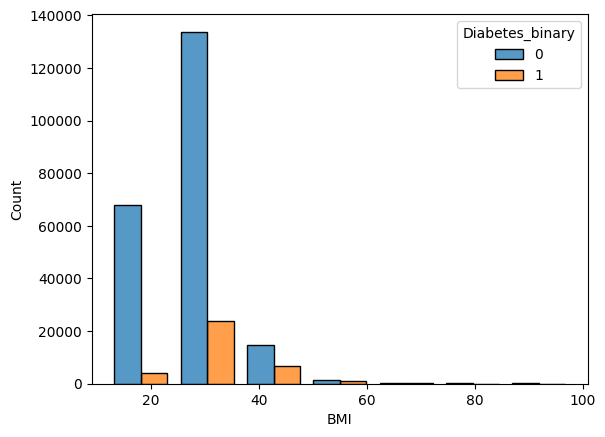

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns

df1 = X.copy(deep=True) #[['Age', 'BMI', 'MentHlth', 'PhysHlth']]
df2 = y["Diabetes_binary"]
df1["Diabetes_binary"] = df2
#sns.pairplot(df1, hue="Diabetes_binary", plot_kws={'alpha': 0.2})
#sns.pairplot(df, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

sns.histplot(data=df1, x="BMI", hue="Diabetes_binary", multiple="dodge", shrink=.8, bins=7)

<Axes: xlabel='MentHlth', ylabel='Count'>

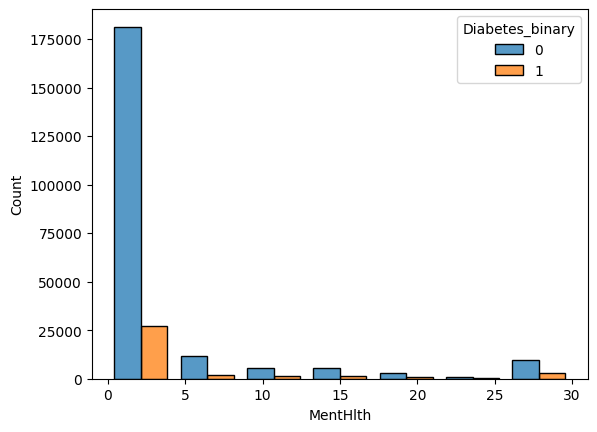

In [ ]:
sns.histplot(data=df1, x="MentHlth", hue="Diabetes_binary", multiple="dodge", shrink=.8, bins=7)

<Axes: xlabel='PhysHlth', ylabel='Count'>

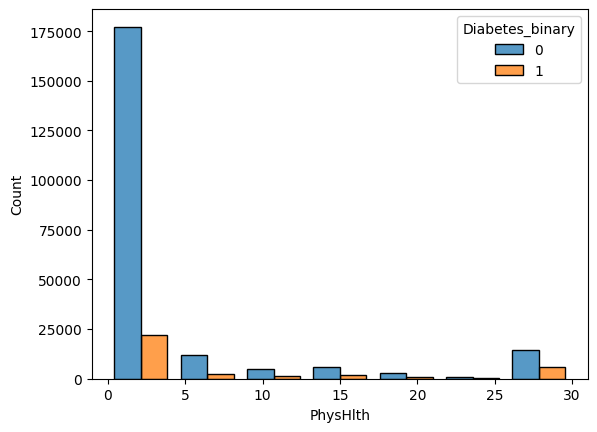

In [ ]:
sns.histplot(data=df1, x="PhysHlth", hue="Diabetes_binary", multiple="dodge", shrink=.8, bins=7)

<Axes: xlabel='Age', ylabel='Count'>

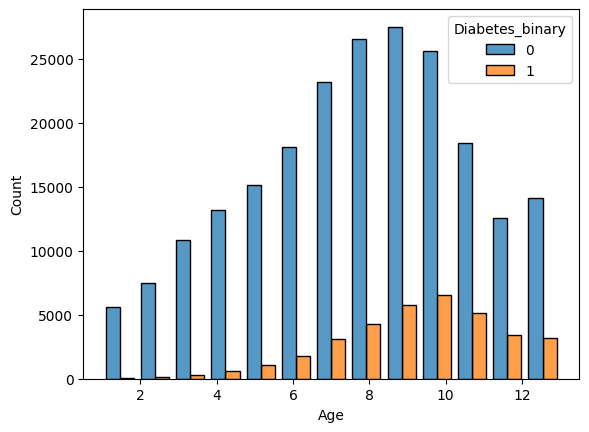

In [ ]:
sns.histplot(data=df1, x="Age", hue="Diabetes_binary", multiple="dodge", shrink=.8, bins=13)

In [ ]:
from multiprocessing import Array
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Decision Tree",
    "Logistic Regression",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(n_neighbors=10), # 10 neighbors
    LinearSVC(random_state=0),
    DecisionTreeClassifier(max_depth=None, random_state=0),
    LogisticRegression(random_state=0),
    RandomForestClassifier(
        max_depth=None, n_estimators=100, random_state=0
    ),
    AdaBoostClassifier(algorithm="SAMME", random_state=0),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]
array = []
cv_folds = 10

In [ ]:
for i in range(0, len(classifiers)):
  clf = classifiers[i]
  scores = cross_val_score(clf, X, y, cv=cv_folds, scoring='roc_auc')
  array.append(scores.mean())
  print("Ran ", names[i], " ", scores.mean())

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Ran  Nearest Neighbors   0.7565000832328381


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Ran  Linear SVM   0.8222682891917847
Ran  Decision Tree   0.5961256611048378


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Ran  Logistic Regression   0.8096915937176131


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Ran  Random Forest   0.7960676561394162


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/skle

Ran  AdaBoost   0.8215583368933412


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Ran  Naive Bayes   0.783851893345784


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Ran  QDA   0.7800607801471097


In [ ]:
array

[np.float64(0.7565000832328381),
 np.float64(0.8222682891917847),
 np.float64(0.5961256611048378),
 np.float64(0.8096915937176131),
 np.float64(0.7960676561394162),
 np.float64(0.8215583368933412),
 np.float64(0.783851893345784),
 np.float64(0.7800607801471097)]

In [ ]:
X.columns


Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [ ]:
!pip install shap

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
PermutationExplainer explainer: 63421it [10:50, 96.01it/s]                            
/tmp/ipython-input-1890119683.py:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


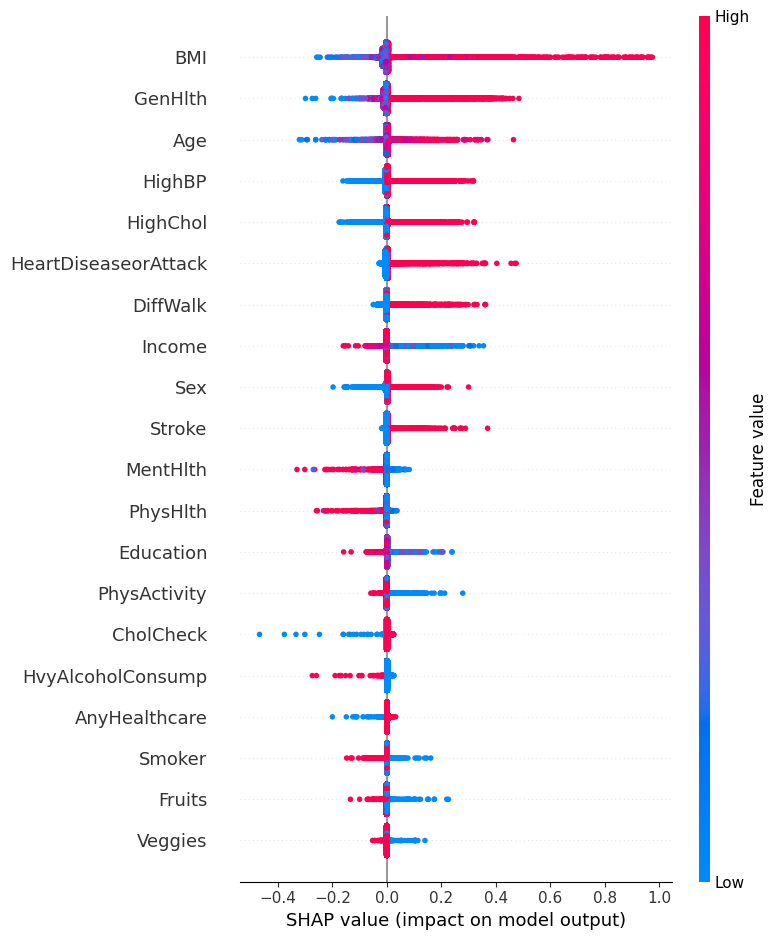

In [ ]:
import shap

clf = LinearSVC(random_state=0)

# Train the model
clf.fit(X_train, y_train)

explainer = shap.Explainer(clf.predict, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

<Axes: >

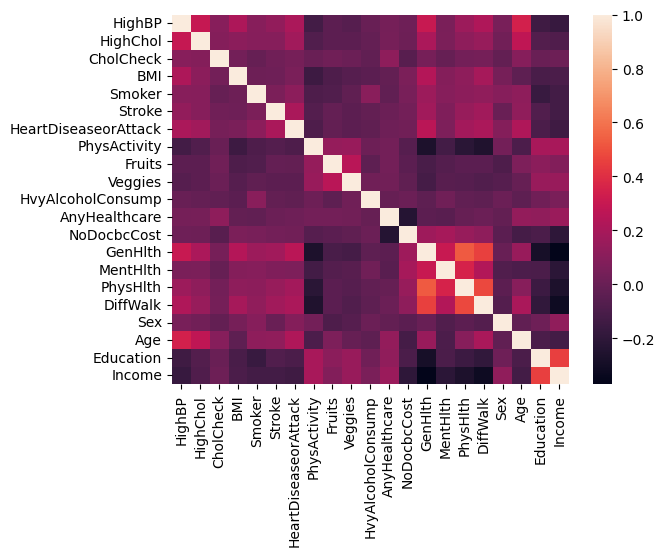

In [ ]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix on the numeric columns
corr = X.select_dtypes('number').corr()

# plot the heatmap
sns.heatmap(corr)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

[0.04636788 0.24281729 0.01147773 ... 0.0879082  0.15900235 0.01823283]


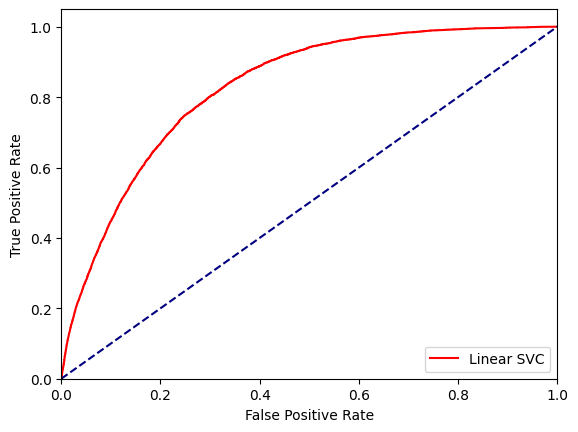

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = [
    KNeighborsClassifier(n_neighbors=10), # 10 neighbors
    LinearSVC(random_state=0),
    DecisionTreeClassifier(max_depth=None, random_state=0),
    LogisticRegression(random_state=0),
    RandomForestClassifier(
        max_depth=None, n_estimators=100, random_state=0
    ),
    AdaBoostClassifier(algorithm="SAMME", random_state=0),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]
# Create a classifier and fit it to the training data
model = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = LinearSVC()
model4 = DecisionTreeClassifier()
model5 = RandomForestClassifier()
model6 = AdaBoostClassifier()
model7 = GaussianNB()
model8 = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)
model5.fit(X_train, y_train)
model6.fit(X_train, y_train)
model7.fit(X_train, y_train)
model8.fit(X_train, y_train)

# Get predicted probabilities for the test data
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred_proba2 = model2.predict_proba(X_test)[:, 1]
# y_pred_proba3 = model3.predict(X_test)
clf = CalibratedClassifierCV(model3)
clf.fit(X_train, y_train)
y_pred_proba3 = clf.predict_proba(X_test)[:, 1]
y_pred_proba4 = model4.predict_proba(X_test)[:, 1]
y_pred_proba5 = model5.predict_proba(X_test)[:, 1]
y_pred_proba6 = model6.predict_proba(X_test)[:, 1]
y_pred_proba7 = model7.predict_proba(X_test)[:, 1]
y_pred_proba8 = model8.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
print(y_pred_proba3)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba2)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_proba3)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_proba4)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred_proba5)
roc_auc5 = auc(fpr5, tpr5)
fpr5, tpr5, thresholds5 = roc_curve(y_test, y_pred_proba5)
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred_proba6)
roc_auc6 = auc(fpr6, tpr6)
fpr7, tpr7, thresholds7 = roc_curve(y_test, y_pred_proba7)
roc_auc7 = auc(fpr7, tpr7)
fpr8, tpr8, thresholds8 = roc_curve(y_test, y_pred_proba8)
roc_auc8 = auc(fpr8, tpr8)
# Plot the ROC curve
plt.figure()
# plt.plot(fpr, tpr, color='darkorange', label='Logistic Regression')
# plt.plot(fpr2, tpr2, color='black', label='K Neighbors Classifier')
plt.plot(fpr3, tpr3, color='red', label='Linear SVC')
# plt.plot(fpr4, tpr4, color='cyan', label='Decision Tree')
# plt.plot(fpr5, tpr5, color='green', label='Random Forest')
# plt.plot(fpr6, tpr6, color='purple', label='AdaBoost')
# plt.plot(fpr7, tpr7, color='pink', label='Gaussian')
# plt.plot(fpr8, tpr8, color='gray', label='QDA')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
plt.savefig('foo.png')

In [ ]:
thresholds_data = pd.DataFrame(data={"TPR": tpr3, "FPR": fpr3, "Thresholds": thresholds3})
thresholds_data

,TPR,FPR,Thresholds
0,0.000000,0.000000,inf
1,0.000000,0.000023,0.991199
2,0.000000,0.000046,0.974867
3,0.000429,0.000046,0.966929
4,0.000429,0.000069,0.964427
...,...,...,...
12101,1.000000,0.996822,0.004894
12102,1.000000,0.996868,0.004881
12103,1.000000,0.996891,0.004872
12104,1.000000,0.996936,0.004871


In [ ]:
import pickle
from google.colab import files

print(clf)

#save model
filename='saved_model.sav'
pickle.dump(clf,open(filename,'wb'))
#files.download(filename)

#load model and make predictions from loaded model
model = pickle.load(open(filename,'rb'))
final_probs=model.predict_proba(X_test)
print(final_probs)

from sklearn.metrics import confusion_matrix as cm

threshold = 0.12079556854343798
predicted_labels = np.array([1 if p >= threshold else 0 for p in final_probs[:, 1]])
cm(y_test, predicted_labels)

CalibratedClassifierCV(estimator=LinearSVC())
[[0.95363212 0.04636788]
 [0.75718271 0.24281729]
 [0.98852227 0.01147773]
 ...
 [0.9120918  0.0879082 ]
 [0.84099765 0.15900235]
 [0.98176717 0.01823283]]


array([[30050, 13689],
       [ 1303,  5694]])

In [ ]:
test_point = [0,0,0,50]
final_probs=model.predict_proba(test_point)
print(final_probs)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 0  0  0 50].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

0.8225


Text(0, 0.5, 'True Positive Rate')

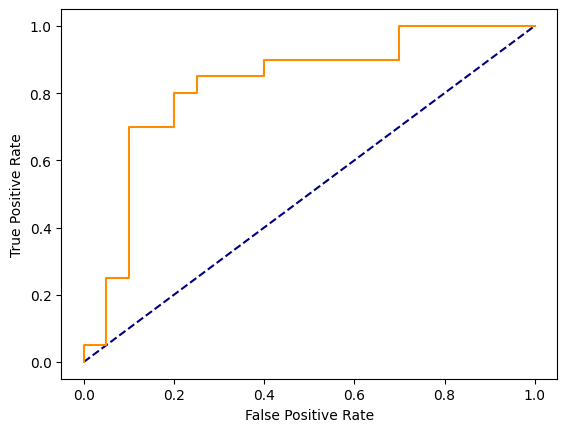

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_pred_proba = [0.010727863, 0.9435284, 0.9986, 0.9879339, 0.99529254, 0.9876391, 0.18534982, 0.99959046, 0.9519703, 0.9960453, 0.98871857, 0.9986643, 0.9819778, 2.2275373e-05, 2.6039845e-05, 0.2963423, 0.8974798, 0.998895, 0.9671582, 0.44001248, 0.00041005193, 4.4890894e-06, 1.3385381e-08, 0.006728016, 0.8488184, 0.05431571, 0.1568951, 0.99574333, 1.2860997e-14, 0.000312217, 0.26120347, 1.2623428e-11, 0.0040665986, 7.289295e-07, 0.65096635, 1.0801501e-09, 3.2775264e-05, 0.00020631542, 0.12611274, 0.99926215]
y_test = ['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative']
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label = "Positive")
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.plot(fpr, tpr, color='darkorange')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
import pandas as pd
thresholds_data = pd.DataFrame(data={"TPR": tpr, "FPR": fpr, "Thresholds": thresholds})
thresholds_data

,TPR,FPR,Thresholds
0,0.00,0.00,inf
1,0.05,0.00,9.995905e-01
2,0.05,0.05,9.992621e-01
3,0.25,0.05,9.960453e-01
4,0.25,0.10,9.957433e-01
5,0.70,0.10,8.974798e-01
6,0.70,0.20,6.509664e-01
7,0.80,0.20,2.963423e-01
8,0.80,0.25,2.612035e-01
9,0.85,0.25,1.853498e-01


In [ ]:
from sklearn.metrics import confusion_matrix as cm
import numpy as np
import pandas as pd
threshold = 0.2963423
predicted_labels = np.array([1 if p >= threshold else 0 for p in y_pred_proba])
y_test_numeric = np.array([1 if label == "Positive" else 0 for label in y_test])
cm(y_test_numeric, predicted_labels)

array([[16,  4],
       [ 4, 16]])